# Explore here

In [3]:
# Dataset Acquisition
import pandas as pd

# Load dataset from URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Storing the Dataset as a CSV File
import os

# Define the path to store the dataset
output_dir = 'data/raw'
os.makedirs(output_dir, exist_ok=True)

# Store the dataset as a CSV file in the raw folder
df.to_csv(f'{output_dir}/ab_nyc_2019.csv', index=False)

print(f'Dataset stored as {output_dir}/ab_nyc_2019.csv')

Dataset stored as data/raw/ab_nyc_2019.csv


In [5]:
# Storing the Dataset in a Database (Using SQLite): Install SQLAlchemy
!pip install sqlalchemy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.5/599.5 kB 19.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [6]:
# Storing the Dataset in a Database (Using SQLite): Setting Up SQLAlchemy and SQLite
from sqlalchemy import create_engine

# Create an SQLite database (this will create a file called AbNyc2019.db)
engine = create_engine('sqlite:///data/AbNyc2019.db')

# Store the dataset in a table called 'AbNyc2019_data'
df.to_sql('AbNyc2019_Data', con=engine, if_exists='replace', index=False)

print("Dataset stored in SQLite database as 'AbNyc2019_Data' table.")

Dataset stored in SQLite database as 'AbNyc2019_Data' table.


In [7]:
# Storing the Dataset in a Database (Using SQLite): Querying the Stored Data

# Query the data from the SQLite database
df_from_db = pd.read_sql('SELECT * FROM AbNyc2019_Data', con=engine)

# Display the first few rows to confirm the data is loaded correctly
df_from_db.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
# Descriptive Analysis
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
# Check the unique values in categorical columns
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [10]:
# Check the unique values in categorical columns
df['price'].value_counts()

price
100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
930        1
920        1
4100       1
3512       1
1494       1
Name: count, Length: 674, dtype: int64

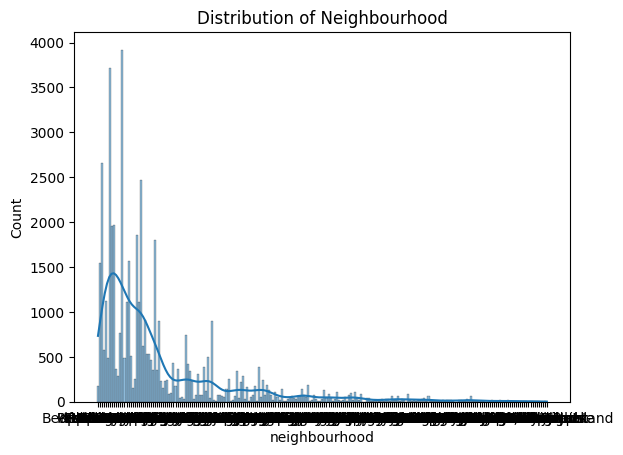

In [13]:
# Visualizing Distributions: Histograms for Numerical Features
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram for the 'Neighbourhood' column
sns.histplot(df['neighbourhood'], bins=30, kde=True)
plt.title('Distribution of Neighbourhood')
plt.show()

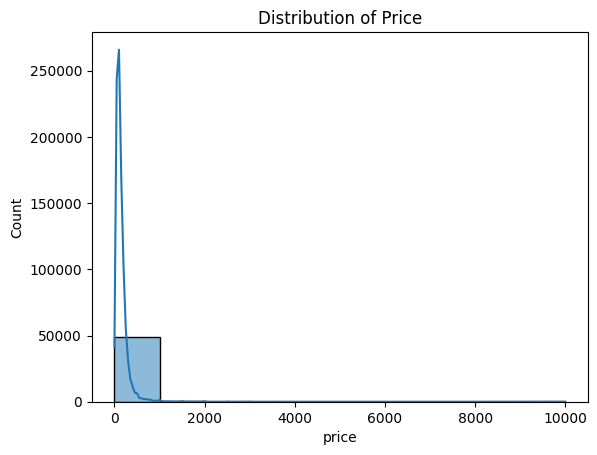

In [17]:
# Visualizing Distributions: Histograms for Numerical Features
sns.histplot(df['price'], bins=10, kde=True)
plt.title('Distribution of Price')
plt.show()

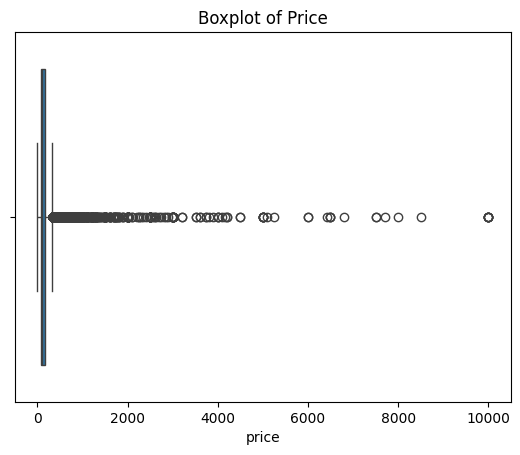

In [18]:
# Visualizing Distributions: Boxplots for Outlier Detection

# Boxplot for Price
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()